1. cargar dataset

In [135]:
!pip install kagglehub


In [136]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("advaypatil/youtube-statistics",)

file = '/videos-stats.csv'

path_file = path + file

print("Path to dataset files:", path_file)


Path to dataset files: /root/.cache/kagglehub/datasets/advaypatil/youtube-statistics/versions/1/videos-stats.csv


In [137]:
!ls /root/.cache/kagglehub/datasets/advaypatil/youtube-statistics/versions/1/

comments.csv  videos-stats.csv


# IMPORTACIÓN DE LIBRERIAS

In [138]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# APARIENCIA DE GRAFICOS

In [140]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

# CARGA DE DATASET

In [141]:
youtube_df = pd.read_csv(path_file)
youtube_df.head(2)

,Unnamed: 0,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0
1,1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779.0,4306.0,1758063.0


# 1 - VALIDACIÓN DE DATOS Y ANALISIS DE NULOS


validar los tipos de datos que tiene el dataframe

In [142]:
youtube_df.dtypes


,0
Unnamed: 0,int64
Title,object
Video ID,object
Published At,object
Keyword,object
Likes,float64
Comments,float64
Views,float64


cuantas columnas tenemos de cada tipo de dato

In [143]:
youtube_df.dtypes.value_counts()


,count
object,4
float64,3
int64,1


## ¿ CUÁNTAS VARIABLES (filas) Y OBSERVACIONES (columnas) TENEMOS EN EL CONJUNTO DE DATOS?

In [144]:
youtube_df.shape

(1881, 8)

## ¿EXISTEN VALORES NULOS EXPLICITOS EN EL COJUNTO DE DATOS?

In [145]:
youtube_df.isnull().any()

,0
Unnamed: 0,False
Title,False
Video ID,False
Published At,False
Keyword,False
Likes,True
Comments,True
Views,True


se identifica la cantidad de registros que tienen nulos

In [146]:
youtube_df.isnull().sum().sort_values(ascending=False)


,0
Likes,2
Comments,2
Views,2
Unnamed: 0,0
Title,0
Video ID,0
Published At,0
Keyword,0


se contabiliza la cantidad de informacion total que se identificaron como nulos

In [147]:
youtube_df.isnull().sum().sum()

6

grafico para analizar los nulos

In [148]:
plot_df = youtube_df.isnull().melt(value_name='missing')
plot_df

,variable,missing
0,Unnamed: 0,False
1,Unnamed: 0,False
2,Unnamed: 0,False
3,Unnamed: 0,False
4,Unnamed: 0,False
...,...,...
15043,Views,False
15044,Views,False
15045,Views,False
15046,Views,True


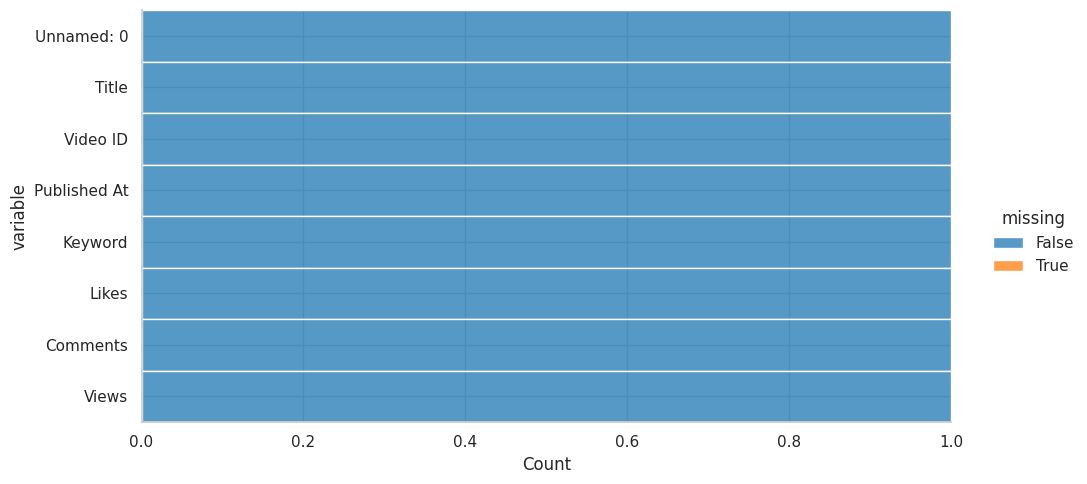

In [149]:
sns.displot(data=plot_df,y='variable',hue='missing',aspect=2,multiple='fill')

<Axes: >

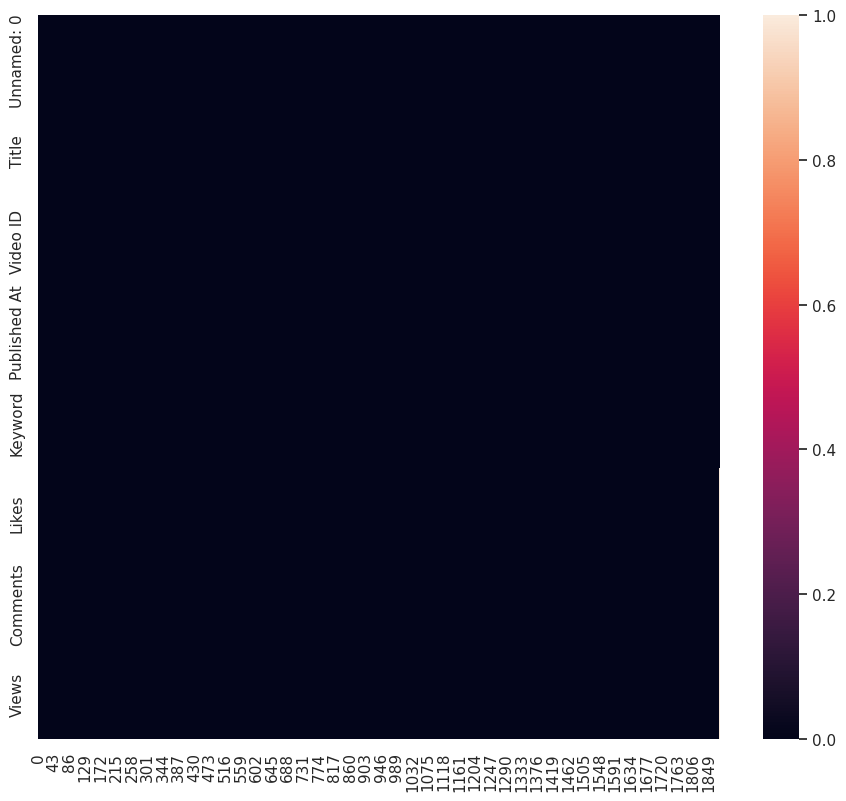

In [150]:
(
    youtube_df
    .isnull()
    .transpose()
    .pipe(
        lambda df: sns.heatmap(data=df)
    )
)

se identifica que la concentracion de nulos se encuentra en los ultimos registros, analisis de impacto de eliminar los nulos

In [151]:
df_youtube_clean = (
    youtube_df
    .dropna()
)
df_youtube_clean.shape

(1879, 8)

In [152]:
youtube_df.shape[0]

1881

In [153]:
df_youtube_clean.shape[0]

1879

In [154]:
youtube_df.shape[0] - df_youtube_clean.shape[0]

2

In [155]:
(df_youtube_clean.shape[0]  / youtube_df.shape[0] )

0.998936735778841

se observa que eliminando los valores nulos conservamos el 90% de nuestra informacion


# 2 FILTRADO DE DATOS PARA UN MEJOR ANALISIS

In [156]:
df_youtube_clean.head(10)

,Unnamed: 0,Title,Video ID,Published At,Keyword,Likes,Comments,Views
0,0,Apple Pay Is Killing the Physical Wallet After...,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0
1,1,The most EXPENSIVE thing I own.,b3x28s61q3c,2022-08-24,tech,76779.0,4306.0,1758063.0
2,2,My New House Gaming Setup is SICK!,4mgePWWCAmA,2022-08-23,tech,63825.0,3338.0,1564007.0
3,3,Petrol Vs Liquid Nitrogen | Freezing Experimen...,kXiYSI7H2b0,2022-08-23,tech,71566.0,1426.0,922918.0
4,4,Best Back to School Tech 2022!,ErMwWXQxHp0,2022-08-08,tech,96513.0,5155.0,1855644.0
5,5,Brewmaster Answers Beer Questions From Twitter...,18fwz9Itbvo,2021-11-05,tech,33570.0,1643.0,943119.0
6,6,Tech Monopolies: Last Week Tonight with John O...,jXf04bhcjbg,2022-06-13,tech,135047.0,9367.0,5937790.0
7,7,I bought the STRANGEST TECH on the Internet.,2TqOmtTAMRY,2022-08-07,tech,216935.0,12605.0,4782514.0
8,8,15 Emerging Technologies that Will Change the ...,wLlL46pYcg4,2021-12-08,tech,45565.0,2882.0,7001236.0
9,9,Toxicologist Answers More Poison Questions Fro...,R7qsau3X6Ks,2022-07-14,tech,24252.0,1068.0,667767.0


In [157]:

df_youtube_process = df_youtube_clean.drop(columns=['Title','Unnamed: 0']).copy()
df_youtube_process.dtypes

,0
Video ID,object
Published At,object
Keyword,object
Likes,float64
Comments,float64
Views,float64


# 3 CONTEOS y CORRELACIONES



### 3.1 CONTEOS POR AÑO


In [158]:
df_youtube_process['Published At'] = pd.to_datetime(df_youtube_process['Published At'])
df_youtube_process['Year'] = df_youtube_process['Published At'].dt.year


In [159]:
count_by_year = df_youtube_process.groupby('Year').size().reset_index(name='Count')
count_by_year

,Year,Count
0,2007,2
1,2008,1
2,2009,9
3,2010,6
4,2011,4
5,2012,12
6,2013,6
7,2014,10
8,2015,15
9,2016,34


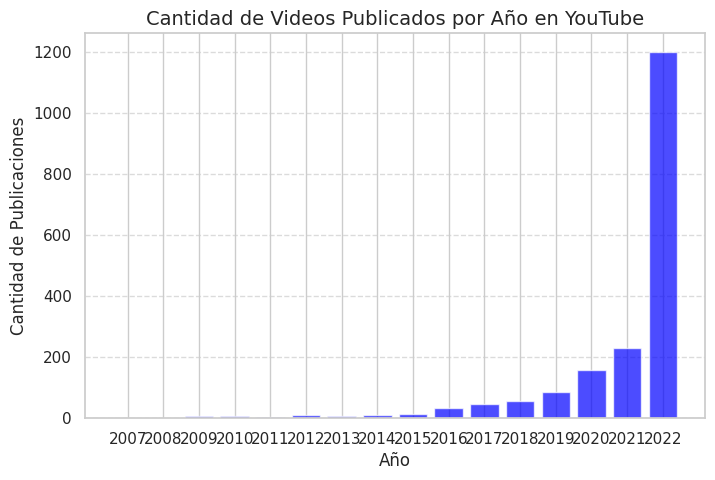

In [160]:
# Crear gráfico de barras
plt.figure(figsize=(8,5))
plt.bar(count_by_year['Year'], count_by_year['Count'], color='blue', alpha=0.7)

# Personalizar el gráfico
plt.title("Cantidad de Videos Publicados por Año en YouTube", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Cantidad de Publicaciones", fontsize=12)
plt.xticks(count_by_year['Year'])
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar gráfico
plt.show()

In [161]:
df_youtube_process['Year'] = df_youtube_process['Published At'].dt.year
df_youtube_process.head(2)

,Video ID,Published At,Keyword,Likes,Comments,Views,Year
0,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,2022
1,b3x28s61q3c,2022-08-24,tech,76779.0,4306.0,1758063.0,2022


In [162]:
df_youtube_process.dtypes

,0
Video ID,object
Published At,datetime64[ns]
Keyword,object
Likes,float64
Comments,float64
Views,float64
Year,int32


### 3.2 CORRELACIÓN DE VARIABLES NÚMERICAS


In [163]:
df_youtube_process.head(2)

,Video ID,Published At,Keyword,Likes,Comments,Views,Year
0,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,2022
1,b3x28s61q3c,2022-08-24,tech,76779.0,4306.0,1758063.0,2022


In [164]:
data=df_youtube_process.corr(numeric_only=True),
data

(             Likes  Comments     Views      Year
 Likes     1.000000  0.892284  0.754475 -0.149090
 Comments  0.892284  1.000000  0.659654 -0.136843
 Views     0.754475  0.659654  1.000000 -0.143512
 Year     -0.149090 -0.136843 -0.143512  1.000000,)

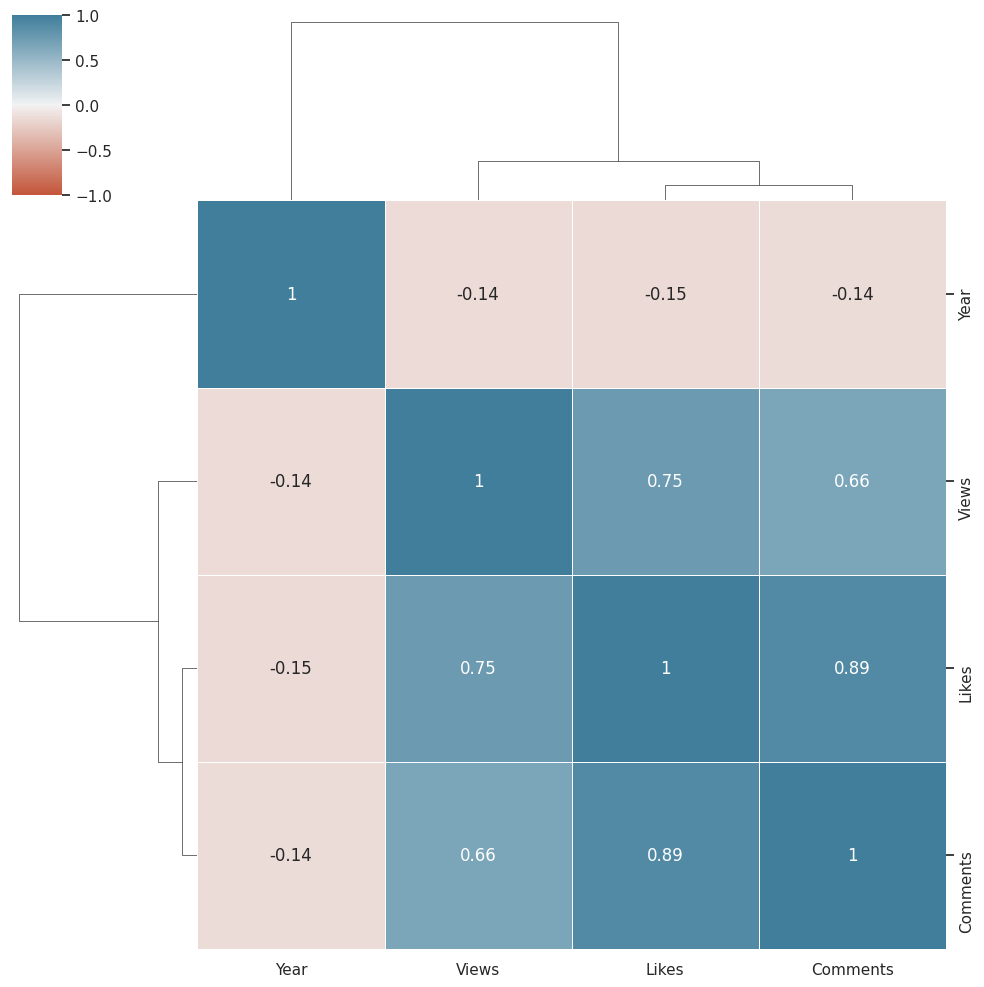

In [165]:
sns.clustermap(
    data=df_youtube_process.corr(numeric_only=True),
    cmap=sns.diverging_palette(20,230,as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={'shrink':0.5},
    annot=True
)

vemos que hay una correlacion entre likes y comentarios

### 3.3 CORRELACIÓN ENTRE DOS VARIABLES (al no tener muchas categoricas estamos añadiendo el analisis del año)


In [166]:
df_youtube_process.head(2)

,Video ID,Published At,Keyword,Likes,Comments,Views,Year
0,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,2022
1,b3x28s61q3c,2022-08-24,tech,76779.0,4306.0,1758063.0,2022


In [167]:
df_youtube_process.dtypes

,0
Video ID,object
Published At,datetime64[ns]
Keyword,object
Likes,float64
Comments,float64
Views,float64
Year,int32


In [168]:
correlation = df_youtube_process[['Year', 'Views']].corr()
correlation


,Year,Views
Year,1.000000,-0.143512
Views,-0.143512,1.000000


In [169]:
correlation_value = df_youtube_process['Year'].corr(df_youtube_process['Views'])
correlation_value

-0.1435120620378709

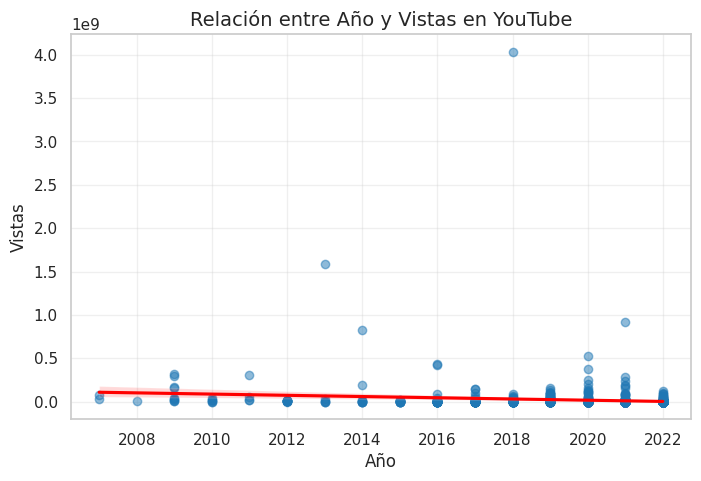

In [170]:
plt.figure(figsize=(8,5))
sns.regplot(x=df_youtube_process['Year'], y=df_youtube_process['Views'], scatter_kws={'alpha':0.5}, line_kws={"color": "red"})

plt.title("Relación entre Año y Vistas en YouTube", fontsize=14)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Vistas", fontsize=12)
plt.grid(alpha=0.3)

plt.show()

conclusiones:

- Los puntos dispersos indican que no hay una relación clara entre el año y la cantidad de vistas.
- La línea roja de tendencia es casi horizontal, lo que sugiere que el año no influye significativamente en la cantidad de vistas.
- Los valores atípicos (outliers) muestran que algunos videos tienen muchas vistas, pero esto ocurre en distintos años sin un patrón claro.

# 4 MEDIDAS DE TENDENCIA CENTRAL Y DISPERSIÓN


## 4.1 TENDENCIA CENTRAL

In [171]:
df_youtube_process.mean(numeric_only=True)


,0
Likes,1.700610e+05
Comments,7.863332e+03
Views,1.161292e+07
Year,2.020880e+03


In [172]:
df_youtube_process.median(numeric_only=True)


,0
Likes,14787.0
Comments,814.0
Views,591721.0
Year,2022.0


In [173]:
df_youtube_process.mode(numeric_only=True)


,Likes,Comments,Views,Year
0,-1.0,1.0,13184.0,2022.0
1,NaN,21.0,14537.0,NaN
2,NaN,NaN,34941.0,NaN
3,NaN,NaN,51885.0,NaN
4,NaN,NaN,95826.0,NaN
5,NaN,NaN,1204024.0,NaN
6,NaN,NaN,1456270.0,NaN
7,NaN,NaN,1564007.0,NaN
8,NaN,NaN,3773387.0,NaN
9,NaN,NaN,23836066.0,NaN


##4.2 DISPERSIÓN

In [174]:
df_youtube_process.min(numeric_only=True)


,0
Likes,-1.0
Comments,-1.0
Views,25.0
Year,2007.0


se valida que hay negativos, se contabiliza los negativos ue existen en cada columna

In [175]:
negativos = (df_youtube_process.select_dtypes(include=['number']) < 0).sum()
negativos


,0
Likes,7
Comments,2
Views,0
Year,0


se genera un nuevo datasets sin valores negativos para no perder data, se estara reemplazado por ceros

In [176]:
df_youtube_process[['Likes', 'Comments', 'Views']] = df_youtube_process[['Likes', 'Comments', 'Views']].clip(lower=0)
df_youtube_process.head(4)

,Video ID,Published At,Keyword,Likes,Comments,Views,Year
0,wAZZ-UWGVHI,2022-08-23,tech,3407.0,672.0,135612.0,2022
1,b3x28s61q3c,2022-08-24,tech,76779.0,4306.0,1758063.0,2022
2,4mgePWWCAmA,2022-08-23,tech,63825.0,3338.0,1564007.0,2022
3,kXiYSI7H2b0,2022-08-23,tech,71566.0,1426.0,922918.0,2022


In [177]:
negativos = (df_youtube_process.select_dtypes(include=['number']) < 0).sum()
negativos

,0
Likes,0
Comments,0
Views,0
Year,0


In [178]:
df_youtube_process.max(numeric_only=True)


,0
Likes,1.644556e+07
Comments,7.328180e+05
Views,4.034122e+09
Year,2.022000e+03


In [179]:
df_youtube_process.std(numeric_only=True)


,0
Likes,7.962293e+05
Comments,3.787996e+04
Views,1.084450e+08
Year,2.207164e+00


In [180]:
(df_youtube_process
 .quantile(q=[0.25,0.50,0.75],numeric_only=True)
 .transpose()
 .rename_axis('metric')
 .reset_index()
 .assign(iqr = lambda df: df[0.75] - df[0.25])
 )

,metric,0.25,0.5,0.75,iqr
0,Likes,2672.5,14787.0,60906.0,58233.5
1,Comments,199.0,814.0,3377.5,3178.5
2,Views,84515.0,591721.0,2804977.5,2720462.5
3,Year,2021.0,2022.0,2022.0,1.0


##4.3 GRAFICA DE MEDIDAS CENTRALES Y DIPSERSIÓN DE LA VARIABLE: Likes


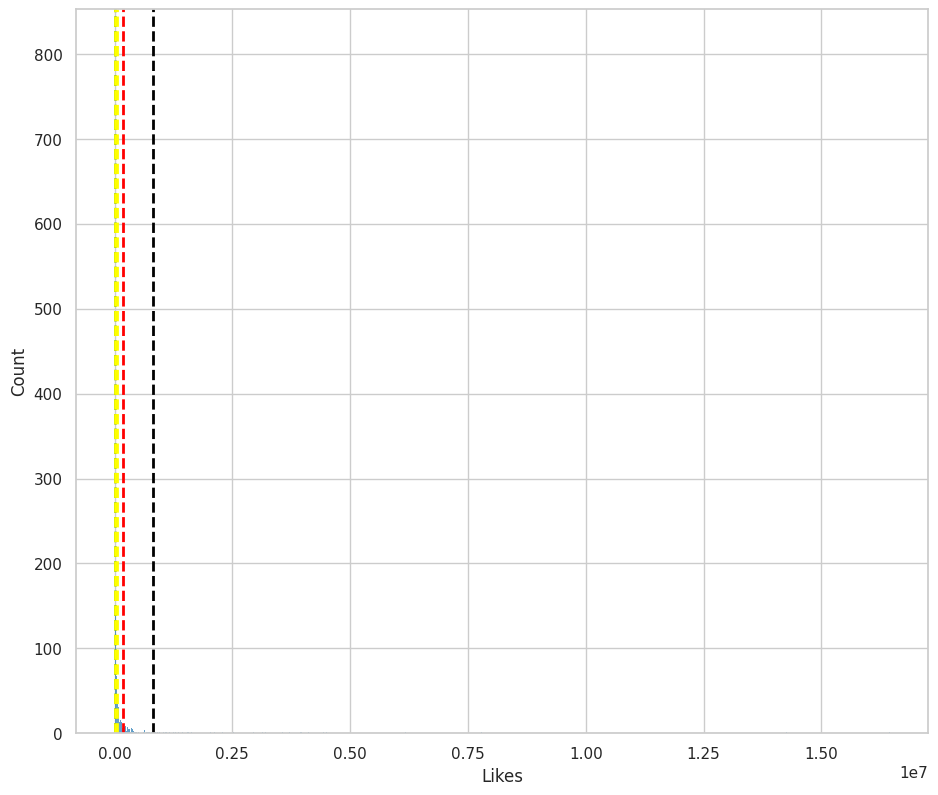

In [181]:
df = df_youtube_process
variable = 'Likes'
sns.histplot(
    data=df,
    x=variable
)
plt.axvline(
    x=df[variable].mean(),
    color='red',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=df[variable].median(),
    color='green',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=df[variable].median() +df[variable].std(),
    color='black',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=df[variable].quantile(0.25),
    color='yellow',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=df[variable].quantile(0.75),
    color='yellow',
    linestyle='dashed',
    linewidth=2
)

#5 CONTEOS Y PROPORCIONES


In [182]:
df_youtube_process.describe()


,Published At,Likes,Comments,Views,Year
count,1879,1.879000e+03,1879.000000,1.879000e+03,1879.000000
mean,2021-06-04 04:28:13.666844160,1.700610e+05,7863.332624,1.161292e+07,2020.879723
min,2007-07-16 00:00:00,0.000000e+00,0.000000,2.500000e+01,2007.000000
25%,2021-02-17 12:00:00,2.672500e+03,199.000000,8.451500e+04,2021.000000
50%,2022-06-15 00:00:00,1.478700e+04,814.000000,5.917210e+05,2022.000000
75%,2022-08-23 00:00:00,6.090600e+04,3377.500000,2.804978e+06,2022.000000
max,2022-08-24 00:00:00,1.644556e+07,732818.000000,4.034122e+09,2022.000000
std,NaN,7.962293e+05,37879.964705,1.084450e+08,2.207164


##5.1 conteo por año

In [190]:
claim_color = {
    'Year':'#ff6602ff'
}


<Axes: xlabel='Year'>

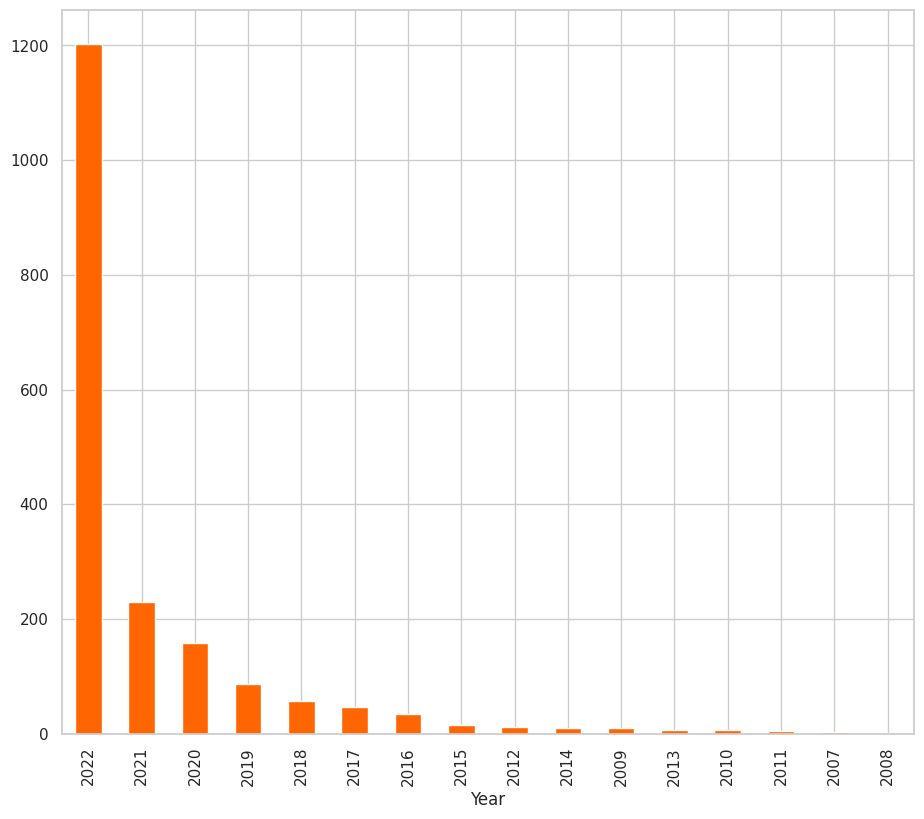

In [191]:
(
    df_youtube_process
    .Year
    .value_counts()
    .plot(
        kind='bar',
        color=claim_color.values()
    )
)

##5.2 PROPORCIONES DE: rating


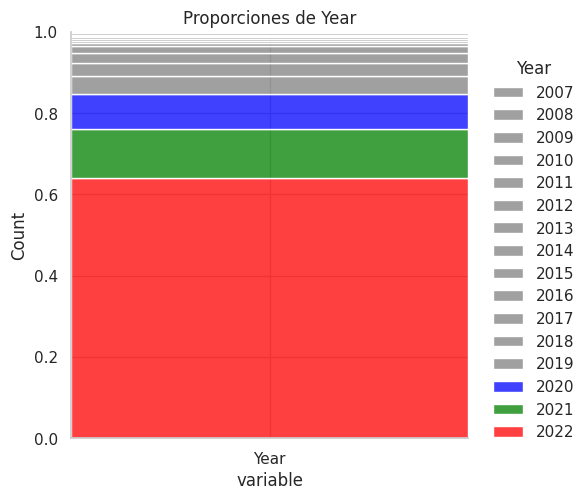

In [192]:
claim_color = {
    2020: 'blue', 2021: 'green', 2022: 'red', 2023: 'purple', 2024: 'orange'
}  # Puedes agregar más años si es necesario
default_color = 'gray'  # Color por defecto para años no especificados


if 'variable' not in df_youtube_process.columns:
    df_youtube_process['variable'] = 'Year'


palette = {r: claim_color.get(r, default_color) for r in df_youtube_process['Year'].dropna().unique()}


sns.displot(data=df_youtube_process, x='variable', hue='Year', multiple='fill', palette=palette)
plt.title('Proporciones de Year')
plt.show()


#6 ANALISIS BIVARIADO


In [201]:
# Definir percentiles para cortar outliers y mejorar la visualización
x_min, x_max = df_youtube_process['Likes'].quantile([0.01, 0.99])  # 1% - 99%
y_min, y_max = df_youtube_process['Comments'].quantile([0.01, 0.99])  # 1% - 99%


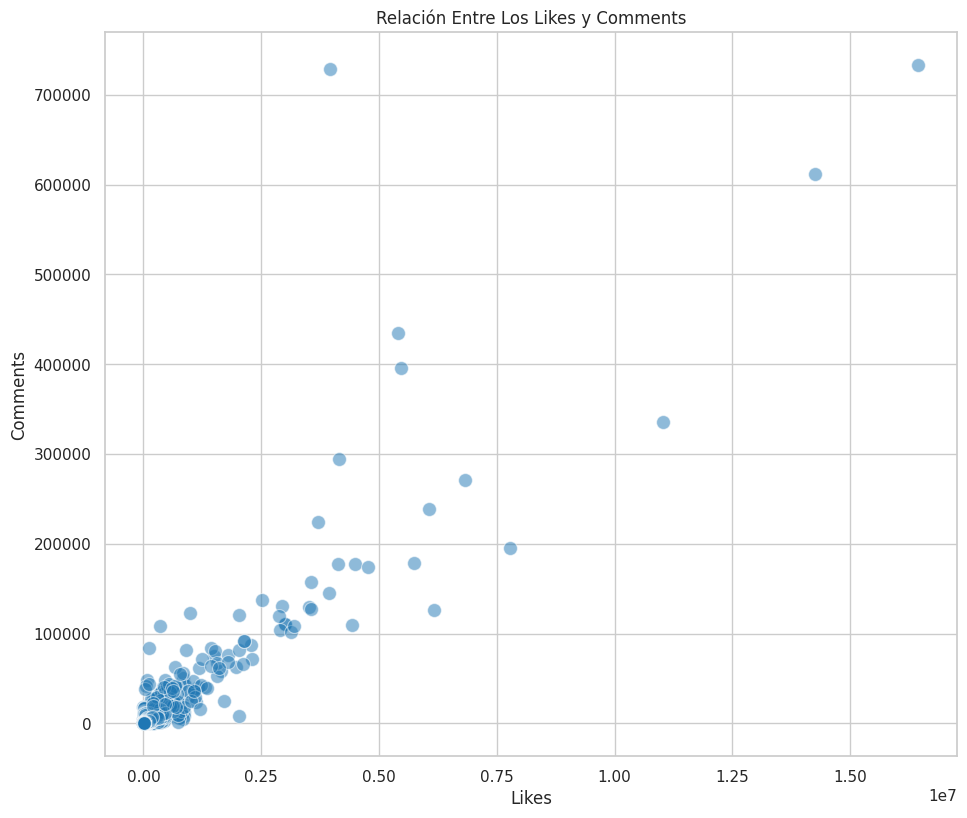

In [194]:
sns.scatterplot(
    data=df_youtube_process,
    x='Likes',
    y='Comments',
    alpha=1/2,
    s=100
)
plt.title('Relación Entre Los Likes y Comments')
plt.show()


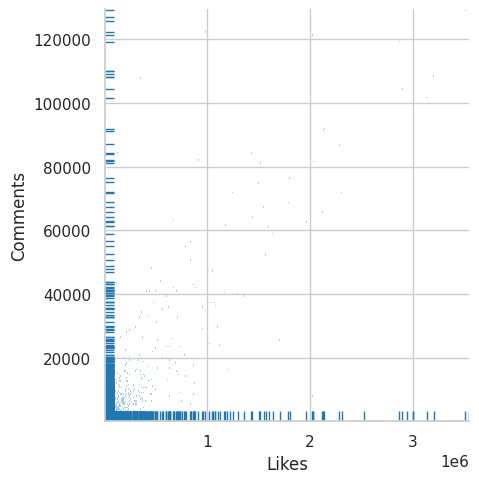

In [202]:

sns.displot(
    data=df_youtube_process,
    x='Likes',
    y='Comments',
    rug=True
)

# Ajustar los límites del gráfico para mejor visualización
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Mostrar gráfico
plt.show()

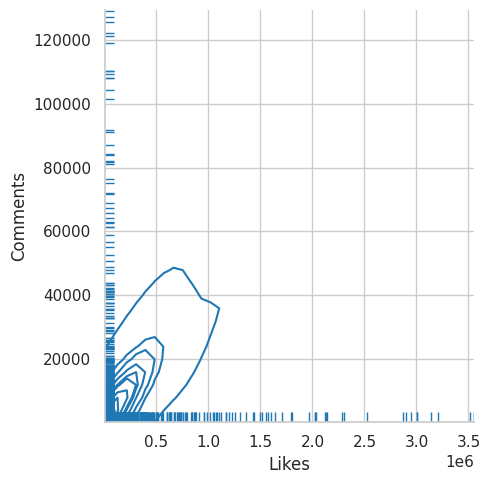

In [203]:

# Crear gráfico KDE con límites ajustados
sns.displot(
    data=df_youtube_process,
    x='Likes',
    y='Comments',
    kind='kde',
    rug=True
)

# Ajustar los límites del gráfico para mejor visualización
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

# Mostrar gráfico
plt.show()